# CLUSTER PRODUCT INTO TYPES

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pywt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from functools import reduce
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
product = pd.read_pickle('./datasets/train_product_series.pkl')

## K-Means

#### Observations
All the time series has the same size

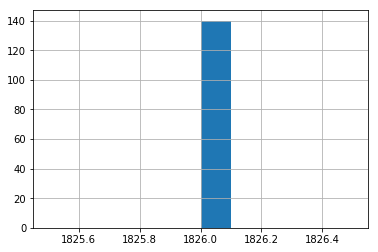

In [17]:
product.groupby('product_id')['date'].apply(lambda x: len(np.unique(x))).hist()

None of the time series has 'holes' in the time serie

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115006c88>,
      dtype=object)

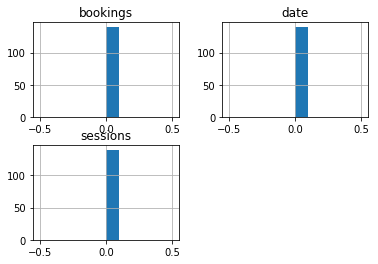

In [18]:
product.groupby('product_id')['date','bookings','sessions'].apply(lambda x: np.sum(x.isna())).hist()

We can compare all the products on the full duration of their historic

#### Optimal number of clusters k

Create the feature matrix of the time series, each feature being the sessions number observed at a given time

In [4]:
a = product.sort_values('date').groupby('product_id')['sessions'].apply(lambda x: list(x)).values
a = np.array(list(a))

Iterate over k and manualy pick a value that seems to be a cutoff

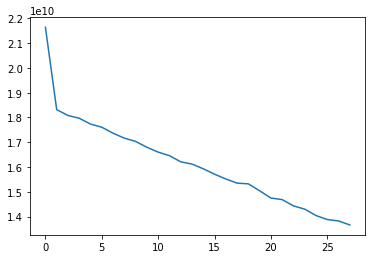

In [5]:
result = []
for k in range(2,30):
    cluster = KMeans(n_clusters=k, max_iter=300)
    cluster.fit(a)
    result.append(cluster.inertia_)
plt.plot(result)

Seems like 3 clusters is the optimal value. Lets visualize the data broke down by this clusterization

In [15]:
cluster = KMeans(n_clusters=3, max_iter=300)
cluster.fit(a)
labels = pd.DataFrame(cluster.labels_, columns = ['product_labels'])
labels.index = labels.index.astype('category')
product_label = pd.merge(left = product, right = labels, left_on='product_id', right_index=True)

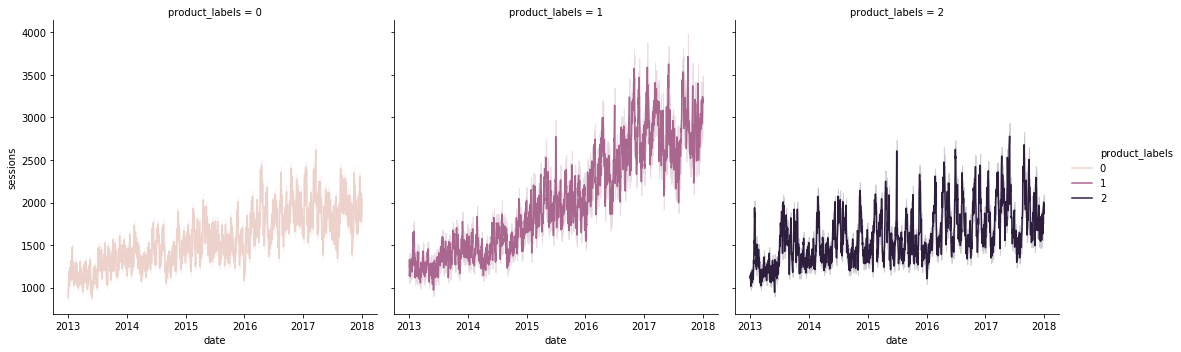

In [15]:
sns.relplot(data = product_label, x = 'date', y = 'sessions', col = 'product_labels', hue = 'product_labels', kind = 'line')

It seems to be a relevant clusterization from the standpoint of sessions

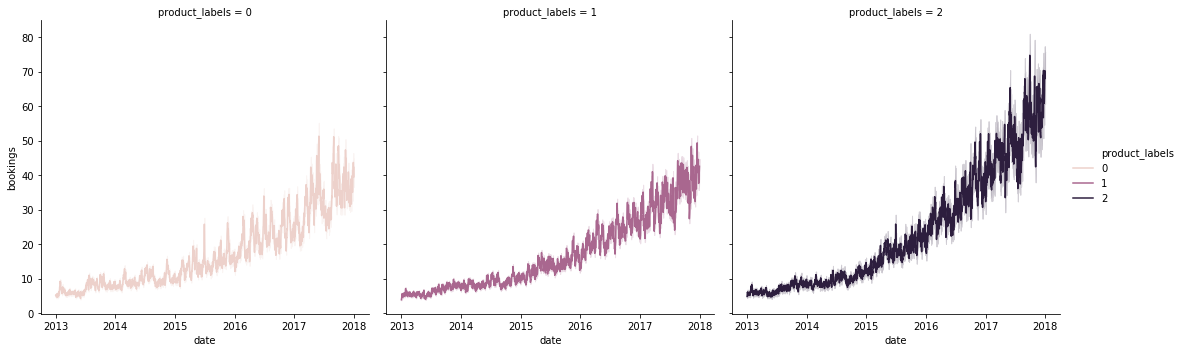

In [19]:
sns.relplot(data = product_label, x = 'date', y = 'bookings', col = 'product_labels', hue = 'product_labels', kind = 'line')

It seems to make sense from the bookings point of view as well

In [23]:
product_label.product_labels = product_label.product_labels.astype('category')
product_label.to_pickle('./datasets/train_labeled_product_series.pkl')

Save the result for the submisssion

In [20]:
labels.index.name = 'product_id'
labels.to_csv('results/otb_interview_task__test__product_groupings_results.csv')